In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse

6262
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(30):
    plt.close()

In [34]:
# -----------------------------------------------------------------------
# --- Invert several points in sin-gate ---
# -----------------------------------------------------------------------
mix.reload_module(mix)
import cmath

n = 6
N = 1 << n

id_inv = 2
alpha_k0 = -1.0
alpha_k1 = np.abs(alpha_k0) * N/(N - 1.)
angle_inv = 2 * (alpha_k0 + id_inv * (2. *  alpha_k1) / N)

print("n \t{:d}".format(n))
print("alpha_0 \t{:0.12e}".format(alpha_k0))
print("alpha_1 \t{:0.12e}".format(alpha_k1))
print("id_inv \t{:d}".format(id_inv))
print("angle_inv \t{:0.12e}".format(angle_inv))

n 	6
alpha_0 	-1.000000000000e+00
alpha_1 	1.015873015873e+00
id_inv 	2
angle_inv 	-1.873015873016e+00


Reading the file ../QuCF/tests/sinCO-gate//sinCO_OUTPUT.hdf5...
Name of the simulation is sinCO
Simulation has been performed  03-10-2024 11:47:11


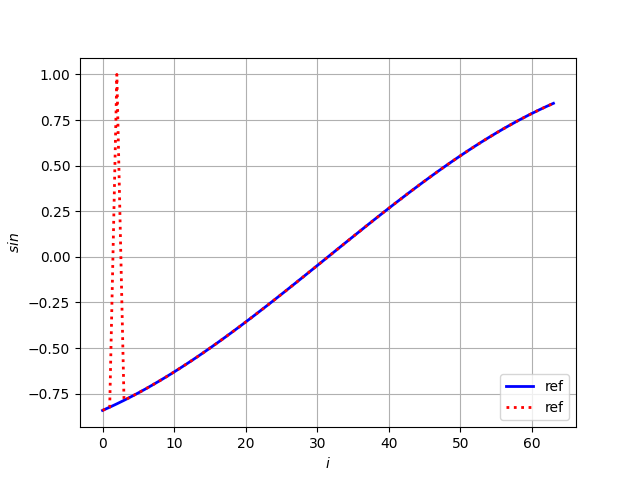

In [35]:
# ---------------------------------------------
# --- QuCF simulations ---
# --------------------------------------------- 
mix.reload_module(mix)
mix.reload_module(mse)

om = mse.MeasOracle__(True)
om.path_ = "../QuCF/tests/sinCO-gate/"
om.pname_ = "sinCO"
om.open()
om.set_work_states(0)

# --- qucf signal ---
coef_had = 2**(n/2.)
y_qc = om.get_var_x({"a_be": 0}, "j") 
y_qc *= coef_had

# --- ref signal ---
y_ref = np.zeros(N)
for ii in range(N):
    aa = alpha_k0 + ii * (2. *  alpha_k1) / N
    y_ref[ii] = np.sin(aa)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(N), y_ref, '-b', linewidth = 2, label = "ref")
ax.plot(range(N), y_qc, ':r', linewidth = 2, label = "ref")
plt.xlabel('$i$')
plt.ylabel("$sin$")
ax.legend()
plt.grid(True)
plt.show()

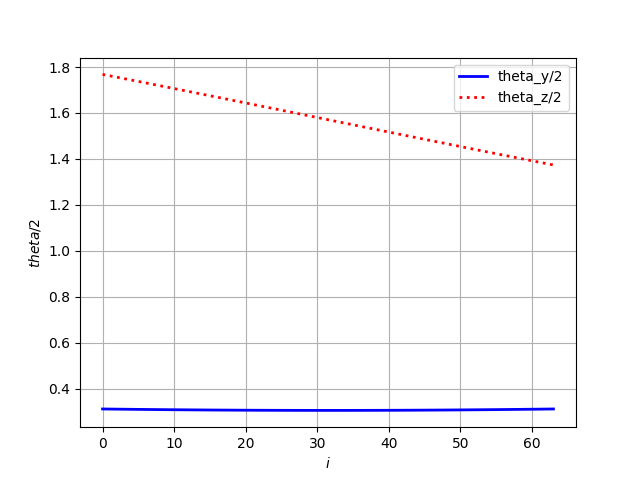

In [11]:

# mix.reload_module(mix)
# import cmath

# n = 6
# N = 1 << n


# # --- Chosen complex profile ---
# vv_max = 0.06
# v_real = np.linspace(-vv_max, vv_max, N)
# v_imag = 0.3

# v_com = np.sin(v_real) + 1j * v_imag
# # v_com = np.sin(v_real)


# angle_y_half = np.zeros(N)
# angle_z_half = np.zeros(N)
# for ii in range(N):
#     ww = cmath.polar(v_com[ii])
#     angle_y_half[ii] = np.arcsin(ww[0])
#     angle_z_half[ii] = ww[1]
    

# alpha_0_y = angle_y_half[0]
# alpha_y   = angle_y_half[1] - angle_y_half[0]

# alpha_0_z = angle_z_half[0]
# alpha_z   = angle_z_half[1] - angle_z_half[0]

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(
#     range(N), angle_y_half, 
#     color='b', linewidth = 2, linestyle='-',  
#     label = "theta_y/2"
# )
# ax.plot(
#     range(N), angle_z_half,
#     color='r', linewidth = 2, linestyle=':',  
#     label = "theta_z/2"
# )
# plt.xlabel('$i$')
# plt.ylabel("$theta/2$")
# ax.legend()
# plt.grid(True)
# plt.show()